<a href="https://colab.research.google.com/github/minonza/house_price_prediction/blob/main/House_price_prediction_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.pandas.set_option('display.max_columns',None)

In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/house_train.csv")

In [ ]:
dataset_test=pd.read_csv("/content/drive/MyDrive/house_test.csv")

In [ ]:
dataset.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  127         120       RL          NaN     4928   Pave   NaN      IR1   
1  889          20       RL         95.0    15865   Pave   NaN      IR1   
2  793          60       RL         92.0     9920   Pave   NaN      IR1   
3  110          20       RL        105.0    11751   Pave   NaN      IR1   
4  422          20       RL          NaN    16635   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      NPkVill       Norm   
1         Lvl    AllPub    Inside       Mod        NAmes       Norm   
2         Lvl    AllPub   CulDSac       Gtl      NoRidge       Norm   
3         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
4         Lvl    AllPub       FR2       Gtl       NWAmes       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm   TwnhsE     1Story            6            5       1976   
1       Norm     1Fam     1Story            8            6       1970   
2       Norm     1Fam     2Story            7            5       1996   
3       Norm     1Fam     1Story            6            6       1977   
4       Norm     1Fam     1Story            6            7       1977   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1976     Gable  CompShg     Plywood     Plywood       None   
1          1970      Flat  Tar&Grv     Wd Sdng     Wd Sdng       None   
2          1997     Gable  CompShg     MetalSd     MetalSd       None   
3          1977       Hip  CompShg     Plywood     Plywood    BrkFace   
4          2000     Gable  CompShg     CemntBd     CmentBd      Stone   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       Gd       TA           No   
1         0.0        Gd        Gd      PConc       TA       Gd           Gd   
2         0.0        Gd        TA      PConc       Gd       TA           Av   
3       480.0        TA        TA     CBlock       Gd       TA           No   
4       126.0        Gd        TA     CBlock       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          ALQ         120          Unf           0        958         1078   
1          ALQ         351          Rec         823       1043         2217   
2          GLQ         862          Unf           0        255         1117   
3          BLQ         705          Unf           0       1139         1844   
4          ALQ        1246          Unf           0        356         1602   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       958         0             0   
1    GasA        Ex          Y      SBrkr      2217         0             0   
2    GasA        Ex          Y      SBrkr      1127       886             0   
3    GasA        Ex          Y      SBrkr      1844         0             0   
4    GasA        Gd          Y      SBrkr      1602         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        958             0             0         2         0             2   
1       2217             1             0         2         0             4   
2       2013             1             0         2         1             3   
3       1844             0             0         2         0             3   
4       1602             0             1         2         0             3   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           1          TA   
1             1          Gd             8        Typ           1          TA   
2             1          TA             8        Typ           1          TA   
3             1          TA       

In [ ]:
dataset.shape

(1168, 81)

In [ ]:
dataset_test.shape

(292, 80)

In [ ]:
dataset_test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   337          20       RL         86.0    14157   Pave   NaN      IR1   
1  1018         120       RL          NaN     5814   Pave   NaN      IR1   
2   929          20       RL          NaN    11838   Pave   NaN      Reg   
3  1148          70       RL         75.0    12000   Pave   NaN      Reg   
4  1227          60       RL         86.0    14598   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         HLS    AllPub    Corner       Gtl      StoneBr       Norm   
1         Lvl    AllPub   CulDSac       Gtl      StoneBr       Norm   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Bnk    AllPub    Inside       Gtl      Crawfor       Norm   
4         Lvl    AllPub   CulDSac       Gtl      Somerst      Feedr   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            9            5       2005   
1       Norm   TwnhsE     1Story            8            5       1984   
2       Norm     1Fam     1Story            8            5       2001   
3       Norm     1Fam     2Story            7            7       1941   
4       Norm     1Fam     2Story            6            5       2007   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2006       Hip  CompShg     VinylSd     VinylSd      Stone   
1          1984     Gable  CompShg     HdBoard     HdBoard       None   
2          2001       Hip  CompShg     VinylSd     VinylSd       None   
3          1950     Gable  CompShg     MetalSd     MetalSd       None   
4          2007     Gable  CompShg     VinylSd     VinylSd      Stone   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       200.0        Gd        TA      PConc       Ex       TA           Gd   
1         0.0        Gd        TA     CBlock       Gd       TA           Av   
2         0.0        Gd        TA      PConc       Gd       TA           Av   
3         0.0        TA        TA     CBlock       TA       TA           No   
4        74.0        Gd        TA      PConc       Gd       TA           Mn   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ        1249          Unf           0        673         1922   
1          GLQ        1036          Unf           0        184         1220   
2          Unf           0          Unf           0       1753         1753   
3          Rec         275          Unf           0        429          704   
4          Unf           0          Unf           0        894          894   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr      1922         0             0   
1    GasA        Gd          Y      SBrkr      1360         0             0   
2    GasA        Ex          Y      SBrkr      1788         0             0   
3    GasA        Ex          Y      SBrkr       860       704             0   
4    GasA        Ex          Y      SBrkr       894      1039             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1922             1             0         2         0             3   
1       1360             1             0         1         0             1   
2       1788             0             0         2         0             3   
3       1564             0             0         1         1             3   
4       1933             0             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           1          Gd   
1             1          Gd             4        Typ           1          Ex   
2             1          Ex             7        Typ           1          TA   
3             1          Fa  

In [ ]:
sns.heatmap(dataset.isnull())

In [ ]:
dataset.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      214
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

**There are many missing values so we have to find the relationship between missing values and saleprice
**

In [ ]:
features_with_na = [features for features in dataset.columns if dataset[features].isnull().sum()>1]
for feature in features_with_na:
  print(feature,np.round(dataset[feature].isnull().mean(),4))
  #printing percentage of missing values

LotFrontage 0.1832
Alley 0.9341
MasVnrType 0.006
MasVnrArea 0.006
BsmtQual 0.0257
BsmtCond 0.0257
BsmtExposure 0.0265
BsmtFinType1 0.0257
BsmtFinType2 0.0265
FireplaceQu 0.4717
GarageType 0.0548
GarageYrBlt 0.0548
GarageFinish 0.0548
GarageQual 0.0548
GarageCond 0.0548
PoolQC 0.994
Fence 0.7971
MiscFeature 0.9623


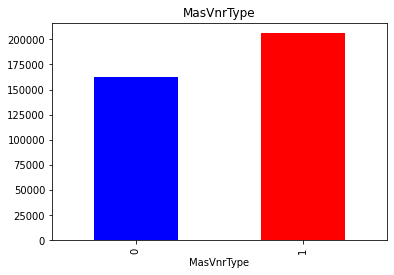

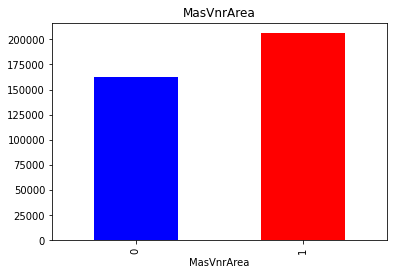

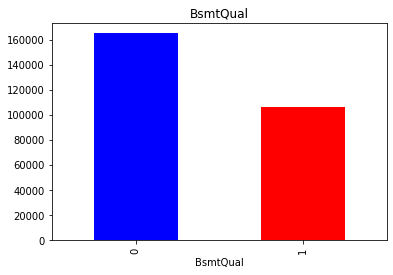

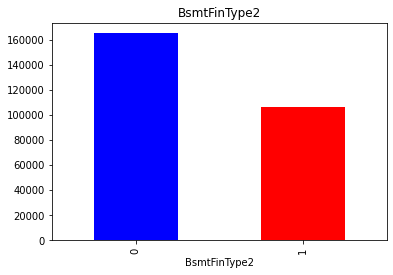

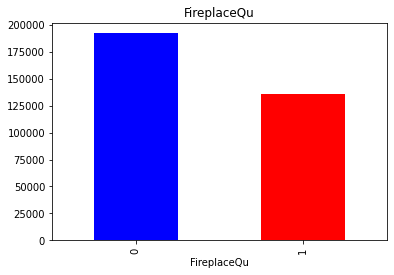

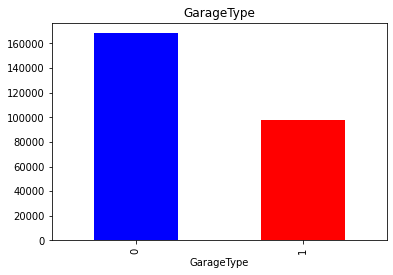

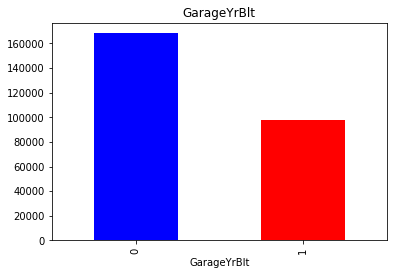

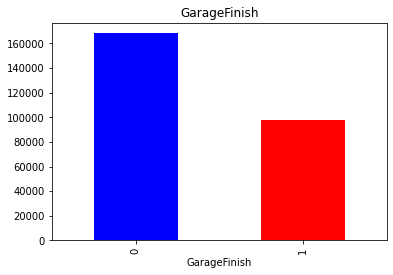

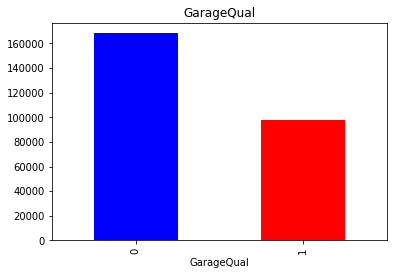

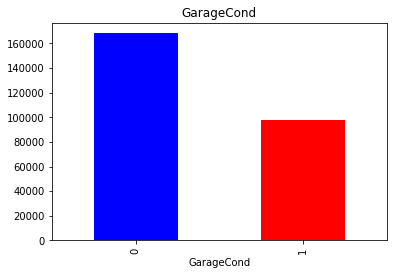

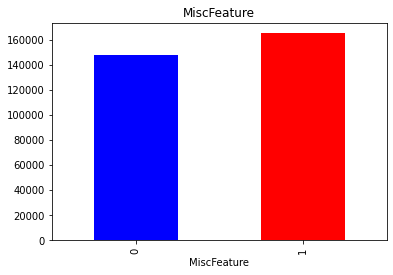

In [ ]:
for feature in features_with_na:
  data= dataset.copy()
  data[feature]=np.where(data[feature].isnull(),1,0)
  data.groupby(feature)['SalePrice'].median().plot.bar(color=['blue','red']) #1 for missing values and 0 for observation present
  plt.title(feature)
  plt.show()

In [ ]:
#numerical features
numerical_features=[feature for feature in dataset.columns if dataset[feature].dtypes !='O']
print('Number of numerical variables:',len(numerical_features))
dataset[numerical_features].head()

Number of numerical variables: 38


Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0  127         120          NaN     4928            6            5       1976   
1  889          20         95.0    15865            8            6       1970   
2  793          60         92.0     9920            7            5       1996   
3  110          20        105.0    11751            6            6       1977   
4  422          20          NaN    16635            6            7       1977   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          1976         0.0         120           0        958         1078   
1          1970         0.0         351         823       1043         2217   
2          1997         0.0         862           0        255         1117   
3          1977       480.0         705           0       1139         1844   
4          2000       126.0        1246           0        356         1602   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       958         0             0        958             0             0   
1      2217         0             0       2217             1             0   
2      1127       886             0       2013             1             0   
3      1844         0             0       1844             0             0   
4      1602         0             0       1602             0             1   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         0             2             1             5           1   
1         2         0             4             1             8           1   
2         2         1             3             1             8           1   
3         2         0             3             1             7           1   
4         2         0             3             1             8           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       1977.0           2         440           0          205   
1       1970.0           2         621          81          207   
2       1997.0           2         455         180          130   
3       1977.0           2         546           0          122   
4       1977.0           2         529         240            0   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2007   
1              0          0          224         0        0      10    2007   
2              0          0            0         0        0       6    2007   
3              0          0            0         0        0       1    2010   
4              0          0            0         0        0       6    2009   

   SalePrice  
0     128000  
1     268000  
2     269790  
3     190000  
4     215000

In [ ]:
dataset.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [ ]:
#temporal variables
year_feature=[feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]
year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [ ]:
for feature in year_feature:
  print(feature,dataset[feature].unique())

YearBuilt [1976 1970 1996 1977 2006 1957 1965 1947 1937 2003 1960 1955 1923 1930
 2007 2001 1972 1950 1961 1953 1918 2010 1922 1934 2005 1946 1941 1948
 1975 1978 1956 2004 1982 2000 2002 1920 1992 1936 1967 1989 1929 1968
 1959 1935 1966 1931 1916 1998 1962 1974 1926 1904 1995 1969 1985 1963
 1958 1892 2008 1971 1980 1945 1986 1981 1949 1940 1954 1925 1915 1921
 1924 1999 1951 1993 1964 1900 1919 1910 1938 1880 1988 1911 1990 1979
 1927 1983 1994 2009 1928 1917 1898 1997 1984 1973 1952 1939 1987 1890
 1942 1991 1932 1908 1914 1882 1905 1875 1906 1893 1912 1913]
YearRemodAdd [1976 1970 1997 1977 2000 2006 1996 1965 1950 2003 1960 1955 2007 2001
 1961 1998 1953 2010 1995 2005 1992 1975 1978 1982 2002 1989 1967 1968
 1959 2004 1966 2008 1987 1981 1969 1985 1963 1991 1993 1971 1990 1956
 1986 1999 1954 1957 1994 1972 1958 1980 1979 1951 1983 2009 1962 1964
 1952 1984 1988 1974 1973]
GarageYrBlt [1977. 1970. 1997. 2006. 1957. 1965. 1947. 1937. 2003. 1974. 1955. 1923.
 2002. 2007. 1987. 200

Text(0.5, 1.0, 'House price vs year sold')

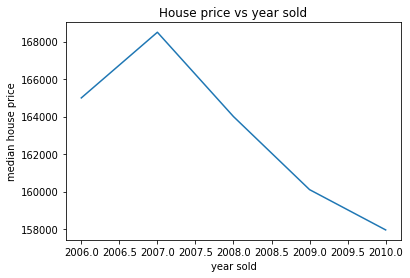

In [ ]:
#to check relationship between year of house sold and sale price
dataset.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel("year sold")
plt.ylabel("median house price")
plt.title("House price vs year sold")



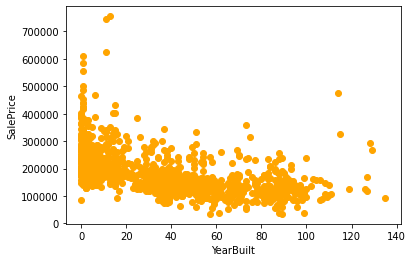

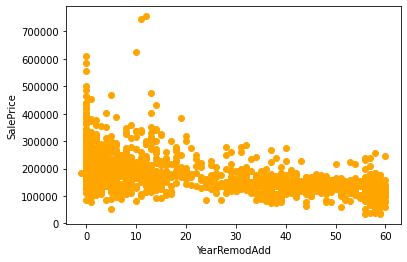

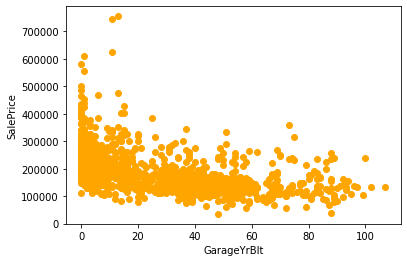

In [ ]:
#difference between all year feature with sale price
for feature in year_feature:
  if feature!='YrSold':
    data=dataset.copy()
    data[feature]=data['YrSold']-data[feature]
    plt.scatter(data[feature],data['SalePrice'],color='orange')
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.show()

In [ ]:
#discrete features in our data
discrete_feature=[feature for feature in numerical_features if len(dataset[feature].unique())<25 and
                  feature not in year_feature+['Id']]
print("discrete feature count: {}".format(len(discrete_feature)))

discrete feature count: 17


In [ ]:
discrete_feature

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

In [ ]:
dataset[discrete_feature].head()

MSSubClass  OverallQual  OverallCond  LowQualFinSF  BsmtFullBath  \
0         120            6            5             0             0   
1          20            8            6             0             1   
2          60            7            5             0             1   
3          20            6            6             0             0   
4          20            6            7             0             0   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  \
0             0         2         0             2             1             5   
1             0         2         0             4             1             8   
2             0         2         1             3             1             8   
3             0         2         0             3             1             7   
4             1         2         0             3             1             8   

   Fireplaces  GarageCars  3SsnPorch  PoolArea  MiscVal  MoSold  
0           1           2          0         0        0       2  
1           1           2          0         0        0      10  
2           1           2          0         0        0       6  
3           1           2          0         0        0       1  
4           1           2          0         0        0       6

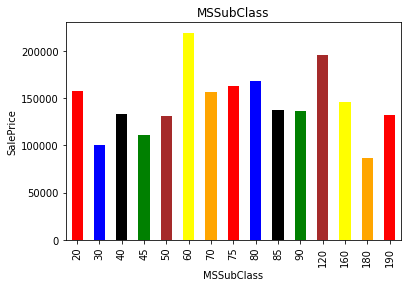

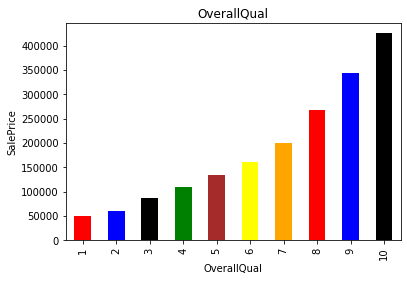

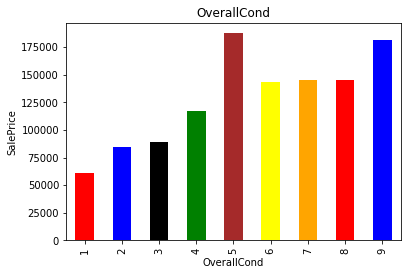

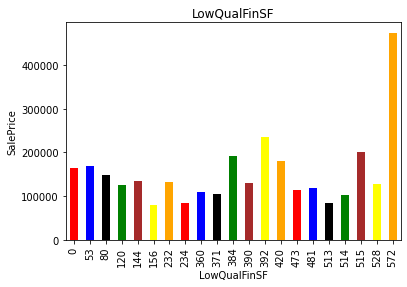

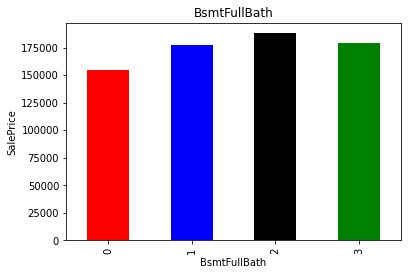

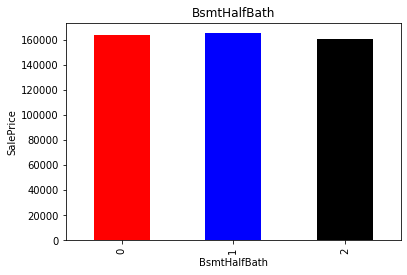

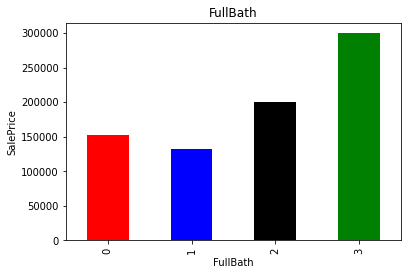

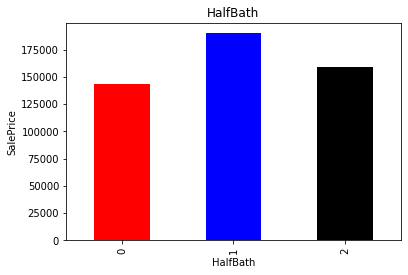

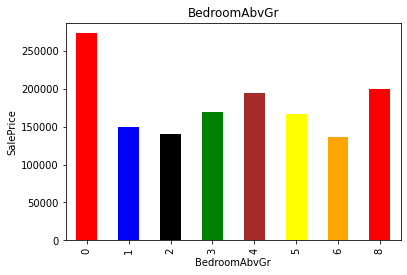

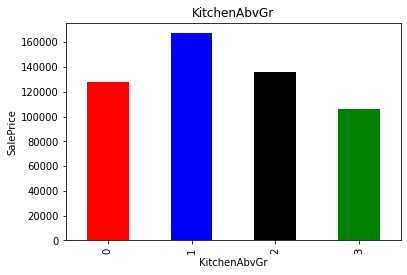

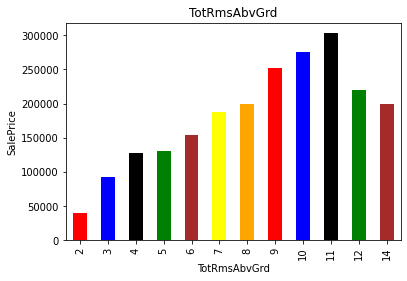

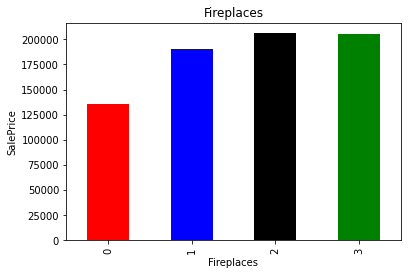

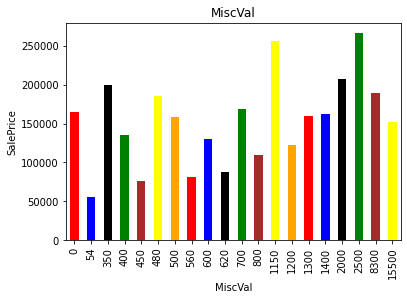

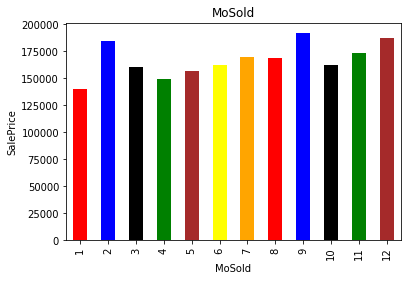

In [ ]:
#relationship between discrete variable and sale price
for feature in discrete_feature:
  data=dataset.copy()
  data.groupby(feature)['SalePrice'].median().plot.bar(color=['red','blue','black','green','brown','yellow','orange'])
  plt.xlabel(feature)
  plt.ylabel('SalePrice')
  plt.title(feature)
  plt.show()

In [ ]:
#continuous variable 
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature+year_feature+['Id']]
print("continuous feature count: {}".format(len(continuous_feature)))


continuous feature count: 16


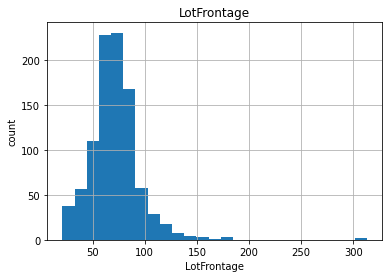

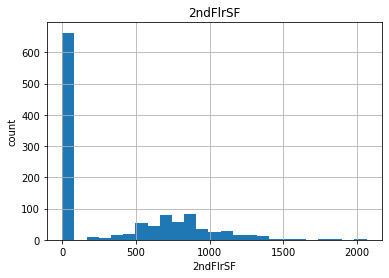

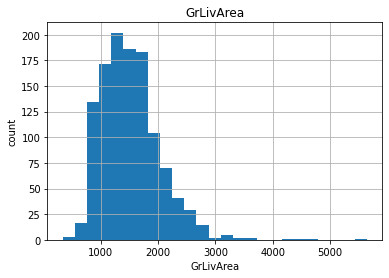

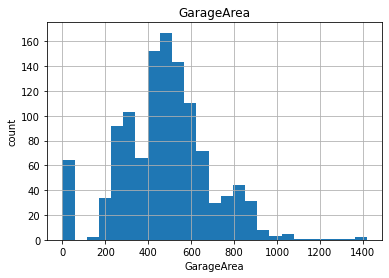

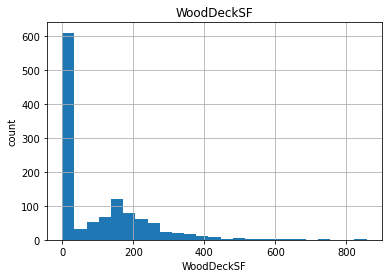

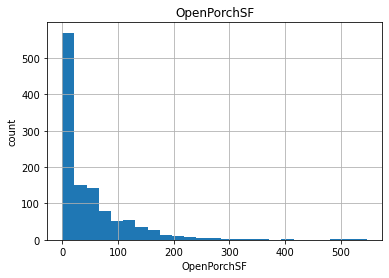

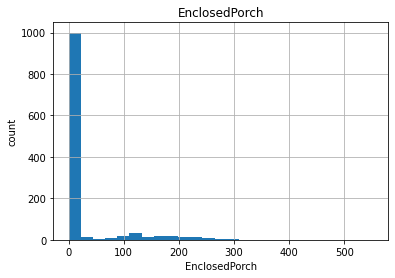

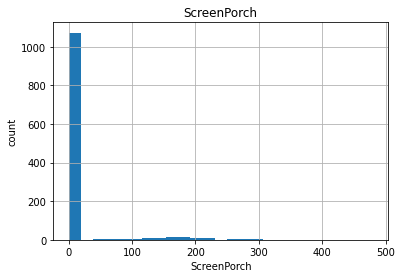

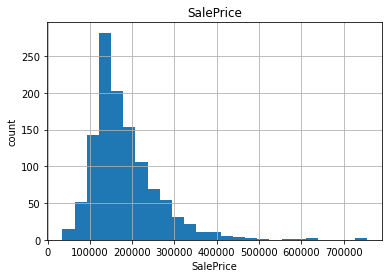

In [ ]:
for feature in continuous_feature:
  data=dataset.copy()
  data[feature].hist(bins=25)
  plt.xlabel(feature)
  plt.ylabel("count")
  plt.title(feature)
  plt.show()



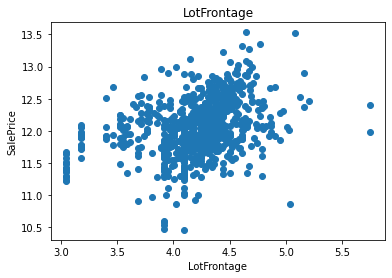

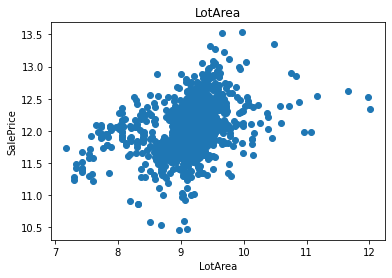

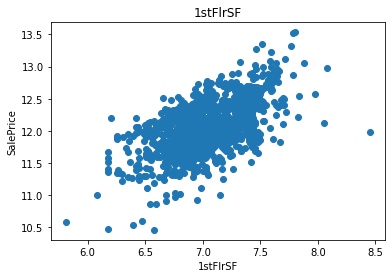

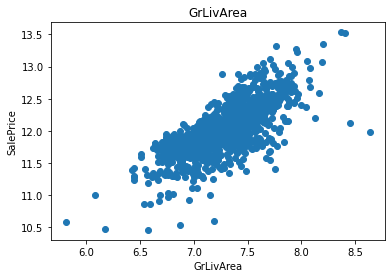

In [ ]:
for feature in continuous_feature:
  data=dataset.copy()
  if 0 in data[feature].unique():
    pass
  else:
    data[feature]=np.log(data[feature])
    data['SalePrice']=np.log(data['SalePrice'])
    plt.scatter(data[feature],data['SalePrice'])
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

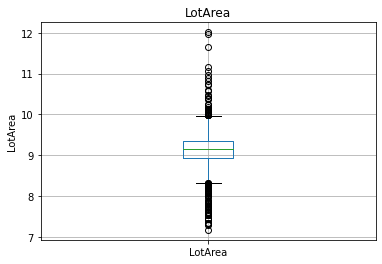

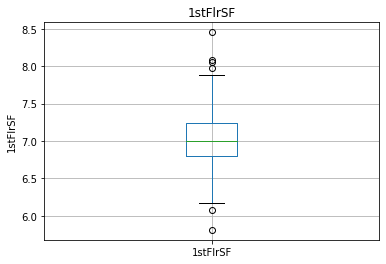

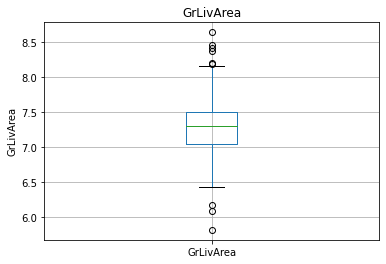

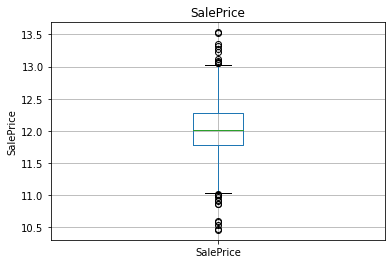

In [ ]:
#outliers
for feature in continuous_feature:
  data=dataset.copy()
  if 0 in data[feature].unique():
    pass
  else:
    data[feature]=np.log(data[feature])
    data.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

In [ ]:
#categorical variable
categorical_features=[feature for feature in dataset.columns
                      if data[feature].dtype=='O']
categorical_features

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [ ]:
dataset[categorical_features].head()

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
1       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Mod   
2       RL   Pave   NaN      IR1         Lvl    AllPub   CulDSac       Gtl   
3       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
4       RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl  \
0      NPkVill       Norm       Norm   TwnhsE     1Story     Gable  CompShg   
1        NAmes       Norm       Norm     1Fam     1Story      Flat  Tar&Grv   
2      NoRidge       Norm       Norm     1Fam     2Story     Gable  CompShg   
3       NWAmes       Norm       Norm     1Fam     1Story       Hip  CompShg   
4       NWAmes       Norm       Norm     1Fam     1Story     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual  \
0     Plywood     Plywood       None        TA        TA     CBlock       Gd   
1     Wd Sdng     Wd Sdng       None        Gd        Gd      PConc       TA   
2     MetalSd     MetalSd       None        Gd        TA      PConc       Gd   
3     Plywood     Plywood    BrkFace        TA        TA     CBlock       Gd   
4     CemntBd     CmentBd      Stone        Gd        TA     CBlock       Gd   

  BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC  \
0       TA           No          ALQ          Unf    GasA        TA   
1       Gd           Gd          ALQ          Rec    GasA        Ex   
2       TA           Av          GLQ          Unf    GasA        Ex   
3       TA           No          BLQ          Unf    GasA        Ex   
4       TA           No          ALQ          Unf    GasA        Gd   

  CentralAir Electrical KitchenQual Functional FireplaceQu GarageType  \
0          Y      SBrkr          TA        Typ          TA     Attchd   
1          Y      SBrkr          Gd        Typ          TA     Attchd   
2          Y      SBrkr          TA        Typ          TA     Attchd   
3          Y      SBrkr          TA        Typ          TA     Attchd   
4          Y      SBrkr          Gd        Typ          TA     Attchd   

  GarageFinish GarageQual GarageCond PavedDrive PoolQC  Fence MiscFeature  \
0          RFn         TA         TA          Y    NaN    NaN         NaN   
1          Unf         TA         TA          Y    NaN    NaN         NaN   
2          Unf         TA         TA          Y    NaN    NaN         NaN   
3          RFn         TA         TA          Y    NaN  MnPrv         NaN   
4          Fin         TA         TA          Y    NaN    NaN         NaN   

  SaleType SaleCondition  
0       WD        Normal  
1       WD        Normal  
2       WD        Normal  
3      COD        Normal  
4       WD        Normal

In [ ]:
for feature in categorical_features:
  print('The feature is {} and number of categories are {}'.format(feature,len(dataset[feature].unique())))

The feature is MSZoning and number of categories are 5
The feature is Street and number of categories are 2
The feature is Alley and number of categories are 3
The feature is LotShape and number of categories are 4
The feature is LandContour and number of categories are 4
The feature is Utilities and number of categories are 1
The feature is LotConfig and number of categories are 5
The feature is LandSlope and number of categories are 3
The feature is Neighborhood and number of categories are 25
The feature is Condition1 and number of categories are 9
The feature is Condition2 and number of categories are 8
The feature is BldgType and number of categories are 5
The feature is HouseStyle and number of categories are 8
The feature is RoofStyle and number of categories are 6
The feature is RoofMatl and number of categories are 8
The feature is Exterior1st and number of categories are 14
The feature is Exterior2nd and number of categories are 15
The feature is MasVnrType and number of cate

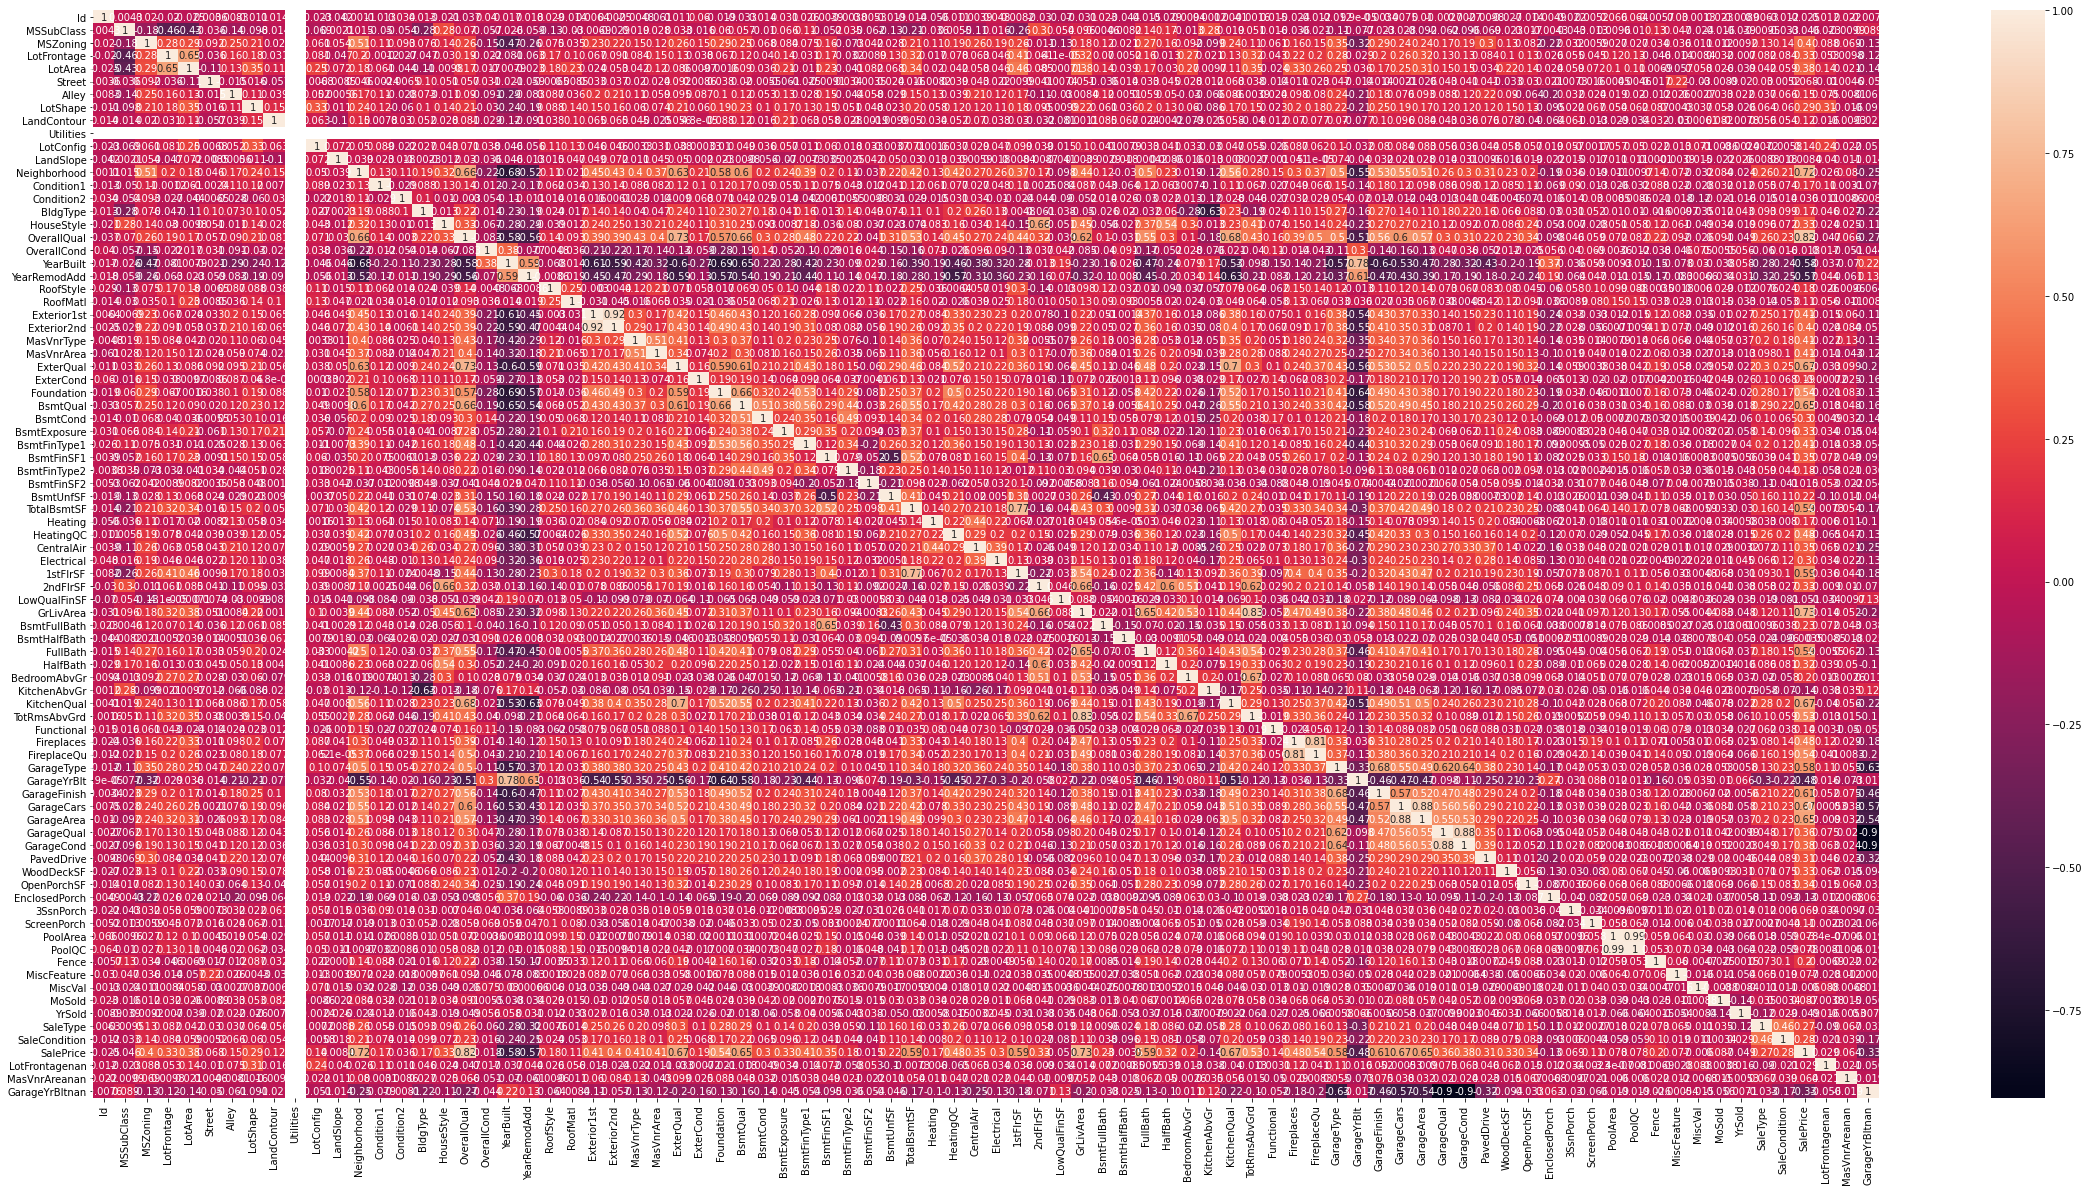

In [71]:
plt.figure(figsize=(40,20))
sns.heatmap(dataset.corr(),annot=True)
plt.show()

In [72]:
dataset.corr()

Id  MSSubClass  MSZoning  LotFrontage   LotArea  \
Id              1.000000    0.004259  0.019999    -0.020278 -0.025426   
MSSubClass      0.004259    1.000000 -0.175138    -0.460005 -0.434493   
MSZoning        0.019999   -0.175138  1.000000     0.278796  0.287792   
LotFrontage    -0.020278   -0.460005  0.278796     1.000000  0.648901   
LotArea        -0.025426   -0.434493  0.287792     0.648901  1.000000   
...                  ...         ...       ...          ...       ...   
SaleCondition  -0.012029   -0.032775  0.135809     0.084132  0.058951   
SalePrice      -0.025061   -0.045982  0.396243     0.333908  0.380781   
LotFrontagenan  0.011587   -0.023405  0.087920     0.053058  0.137389   
MasVnrAreanan   0.021921   -0.009890  0.069470     0.009808  0.021073   
GarageYrBltnan -0.007594    0.089455 -0.128050    -0.123446 -0.143532   

                  Street     Alley  LotShape  LandContour  Utilities  \
Id              0.003613  0.008284 -0.011359     0.013677        NaN   
MSSubClass     -0.035981 -0.141808 -0.098102    -0.013532        NaN   
MSZoning        0.092054  0.250815  0.205139     0.020019        NaN   
LotFrontage    -0.035739  0.155400  0.181225     0.030699        NaN   
LotArea        -0.110007  0.127556  0.348626     0.106523        NaN   
...                  ...       ...       ...          ...        ...   
SaleCondition   0.005173  0.065956  0.060477     0.053718        NaN   
SalePrice       0.068399  0.149291  0.285422     0.118178        NaN   
LotFrontagenan -0.010120  0.075118  0.308041     0.015837        NaN   
MasVnrAreanan   0.004552 -0.008094 -0.016091    -0.009299        NaN   
GarageYrBltnan -0.050282 -0.061259 -0.091284    -0.020613        NaN   

                LotConfig  LandSlope  Neighborhood  Condition1  Condition2  \
Id              -0.022721  -0.041576      0.001113   -0.012858    0.033815   
MSSubClass      -0.069133   0.002128      0.014623   -0.049529   -0.054470   
MSZoning         0.060975   0.054351      0.509115    0.112983    0.092516   
LotFrontage      0.081043  -0.047217      0.199896   -0.001170   -0.027457   
LotArea          0.248449   0.072462      0.180485    0.060683   -0.044271   
...                   ...        ...           ...         ...         ...   
SaleCondition   -0.005753   0.017979      0.214622    0.074206    0.014078   
SalePrice        0.135845   0.008440      0.716805    0.171124    0.036342   
LotFrontagenan   0.239970   0.039920      0.025975    0.105813    0.011492   
MasVnrAreanan    0.022231   0.011281      0.080220    0.003127    0.008553   
GarageYrBltnan  -0.051359  -0.014126     -0.247794   -0.078773   -0.008051   

                BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
Id              0.013019   -0.021374    -0.036965     0.039761   0.016525   
MSSubClass     -0.278379    0.280526     0.070462    -0.056978  -0.025650   
MSZoning        0.076175    0.141079     0.259181    -0.147128  -0.472884   
LotFrontage    -0.046967    0.029675     0.193517    -0.021709  -0.081215   
LotArea        -0.113092   -0.009810     0.167825     0.017039  -0.007861   
...                  ...         ...          ...          ...        ...   
SaleCondition   0.099277    0.072404     0.232687     0.015687  -0.238421   
SalePrice       0.167654    0.325997     0.818551    -0.018422  -0.576997   
LotFrontagenan  0.045531    0.024168    -0.046751     0.016698  -0.036671   
MasVnrAreanan   0.026863    0.025374     0.066009    -0.051041  -0.070245   
GarageYrBltnan -0.217179   -0.112606    -0.267177    -0.043975   0.219895   

                YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  \
Id                  0.018025   0.028737 -0.014222     0.006428     0.002463   
MSSubClass         -0.059092  -0.127819 -0.029861    -0.006941    -0.028712   
MSZoning           -0.257230   0.075016  0.034817     0.227575     0.215866   
LotFrontage        -0.063319   0.169676  0.103451     0.067002     0.091245   
LotArea            -0.0

In [73]:
dataset.describe()

Id   MSSubClass     MSZoning  LotFrontage      LotArea  \
count  1168.000000  1168.000000  1168.000000  1168.000000  1168.000000   
mean    724.136130    56.767979     2.728596     4.213258     9.117634   
std     416.159877    41.940650     0.782721     0.314679     0.505260   
min       1.000000    20.000000     0.000000     3.044522     7.170120   
25%     360.500000    20.000000     3.000000     4.094345     8.938727   
50%     714.500000    50.000000     3.000000     4.248495     9.161413   
75%    1079.500000    70.000000     3.000000     4.372593     9.351449   
max    1460.000000   190.000000     4.000000     5.746203    12.011638   

            Street        Alley     LotShape  LandContour  Utilities  \
count  1168.000000  1168.000000  1168.000000  1168.000000     1168.0   
mean      0.996575     1.898973     0.404110     1.054795        0.0   
std       0.058445     0.401453     0.571578     0.457718        0.0   
min       0.000000     0.000000     0.000000     0.000000        0.0   
25%       1.000000     2.000000     0.000000     1.000000        0.0   
50%       1.000000     2.000000     0.000000     1.000000        0.0   
75%       1.000000     2.000000     1.000000     1.000000        0.0   
max       1.000000     2.000000     3.000000     3.000000        0.0   

         LotConfig    LandSlope  Neighborhood   Condition1   Condition2  \
count  1168.000000  1168.000000   1168.000000  1168.000000  1168.000000   
mean      1.342466     0.966610      9.120719     1.974315     0.988014   
std       0.800072     0.229932      5.554897     0.638140     0.108870   
min       0.000000     0.000000      0.000000     0.000000     0.000000   
25%       1.000000     1.000000      5.000000     2.000000     1.000000   
50%       1.000000     1.000000      8.000000     2.000000     1.000000   
75%       2.000000     1.000000     12.000000     2.000000     1.000000   
max       4.000000     2.000000     20.000000     5.000000     1.000000   

          BldgType   HouseStyle  OverallQual  OverallCond    YearBuilt  \
count  1168.000000  1168.000000  1168.000000  1168.000000  1168.000000   
mean      2.912671     3.731164     6.104452     5.595890    36.874144   
std       0.665654     1.697719     1.390153     1.124343    30.193130   
min       0.000000     0.000000     1.000000     1.000000     0.000000   
25%       3.000000     3.000000     5.000000     5.000000     8.000000   
50%       3.000000     3.000000     6.000000     5.000000    36.000000   
75%       3.000000     6.000000     7.000000     6.000000    54.000000   
max       4.000000     6.000000    10.000000     9.000000   135.000000   

       YearRemodAdd    RoofStyle     RoofMatl  Exterior1st  Exterior2nd  \
count   1168.000000  1168.000000  1168.000000  1168.000000  1168.000000   
mean      23.046233     1.199486     0.020548     5.619007     5.534247   
std       20.783486     0.455867     0.141926     3.291528     3.222222   
min       -1.000000     0.000000     0.000000     0.000000     0.000000   
25%        4.000000     1.000000     0.000000     2.000000     2.000000   
50%       14.000000     1.000000     0.000000     5.000000     6.000000   
75%       42.000000     1.000000     0.000000     9.000000     9.000000   
max       60.000000     3.000000     1.000000    10.000000    10.000000   

        MasVnrType   MasVnrArea    ExterQual    ExterCond   Foundation  \
count  1168.000000  1168.000000  1168.000000  1168.000000  1168.000000   
mean      1.555651   101.696918     1.404110     2.827911     2.751712   
std       0.886141   182.218483     0.577543     0.530485     1.168714   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       1.000000     0.000000     1.000000     3.000000     2.000000   
50%       1.000000     0.000000     1.000000     3.000000     2.000000   
75%       2.000000   160.000000     2.000000     3.000000     4.000000   
max       4.000000  1600.000000     3.000000     3.000000     4.000000   

          Bsmt

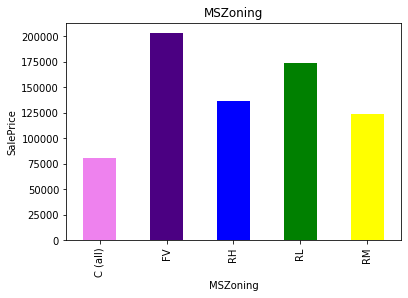

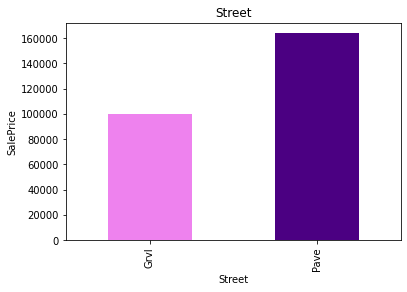

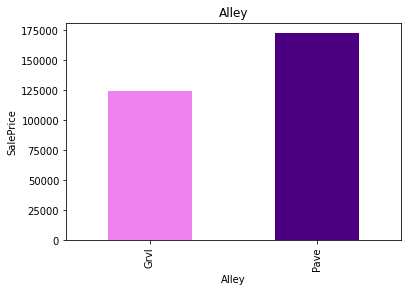

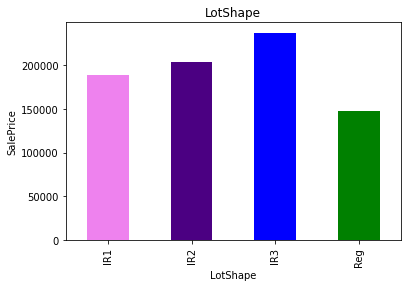

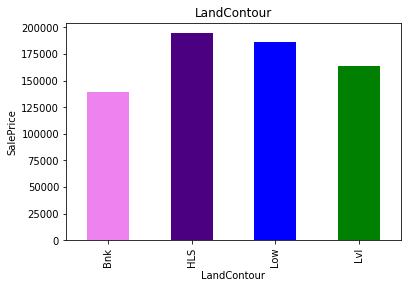

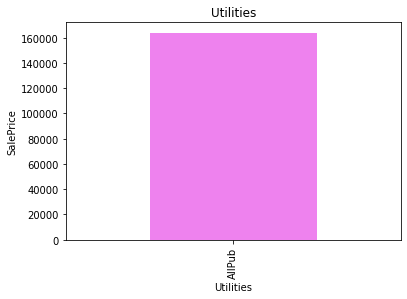

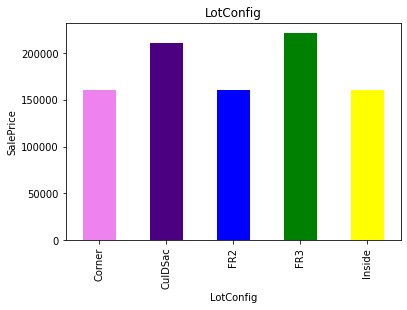

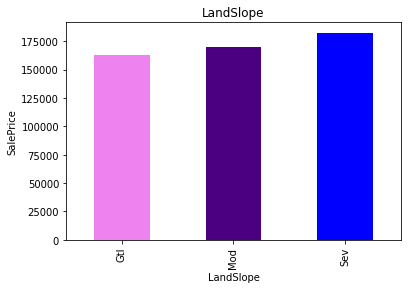

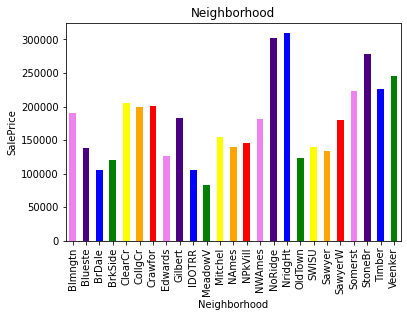

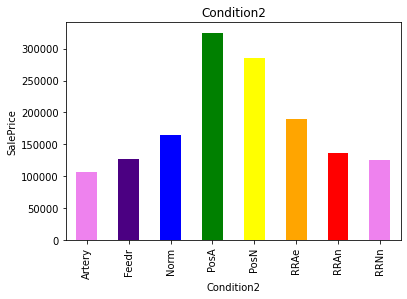

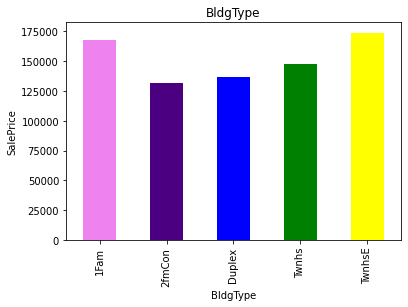

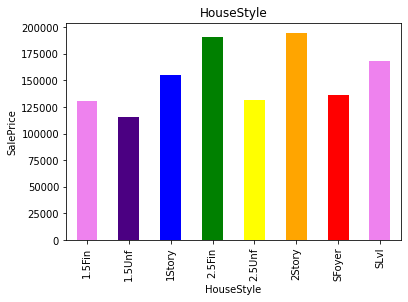

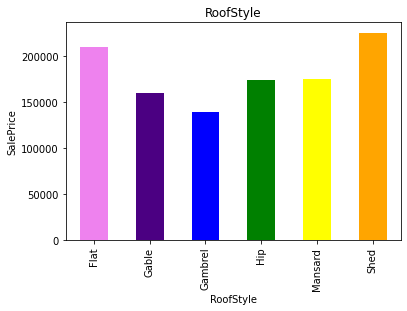

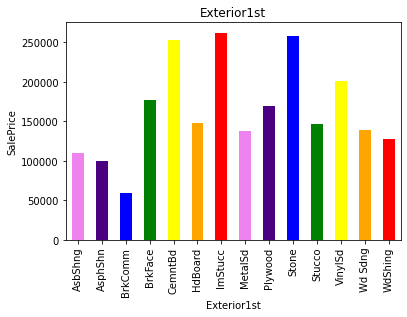

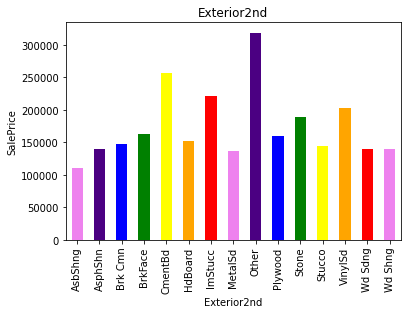

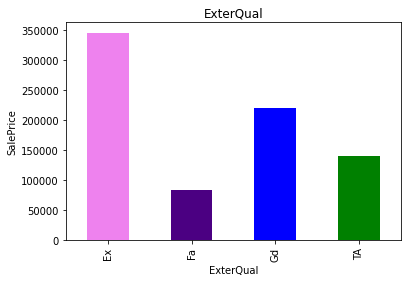

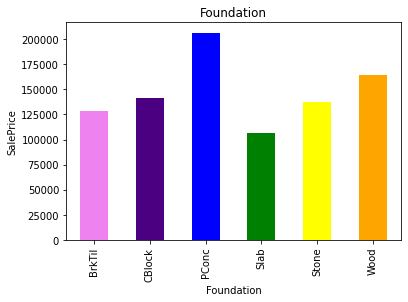

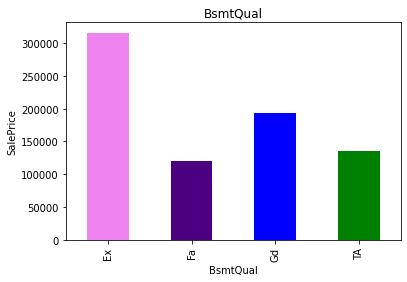

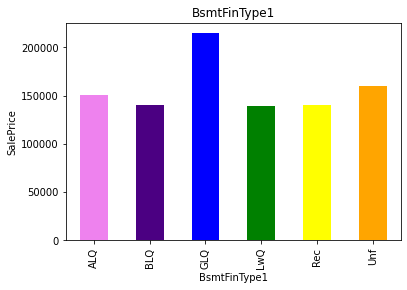

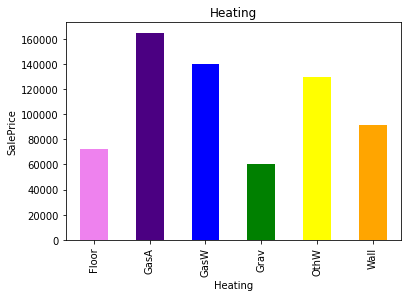

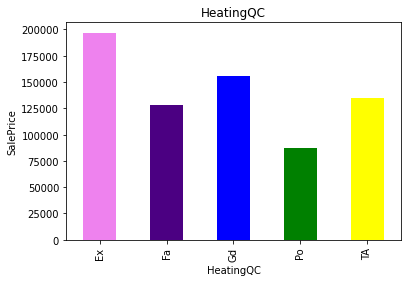

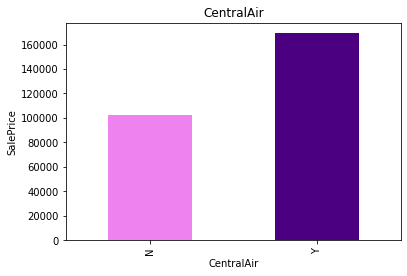

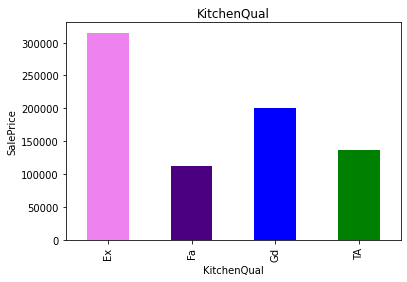

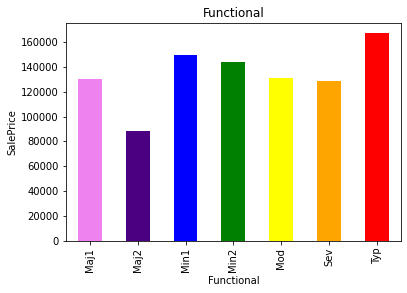

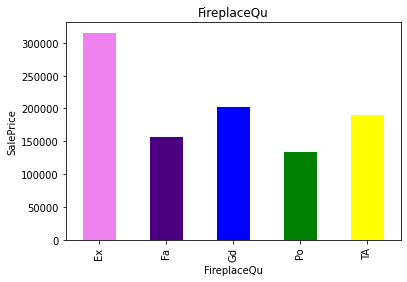

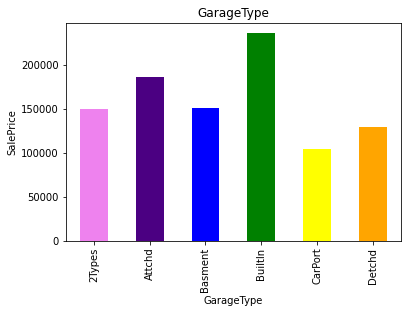

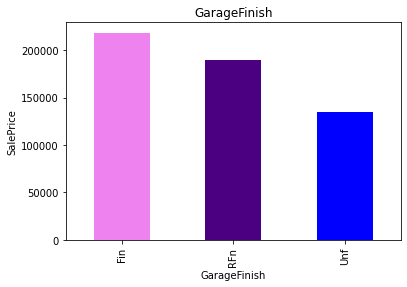

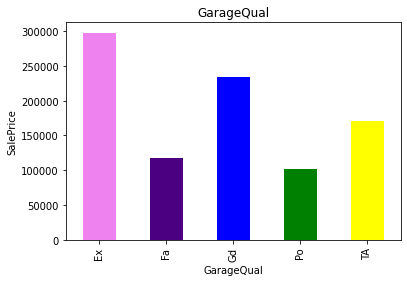

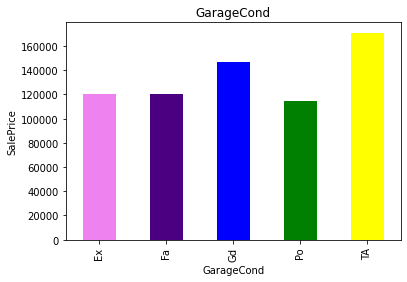

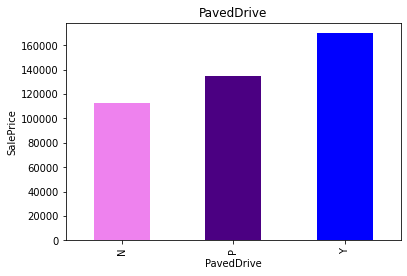

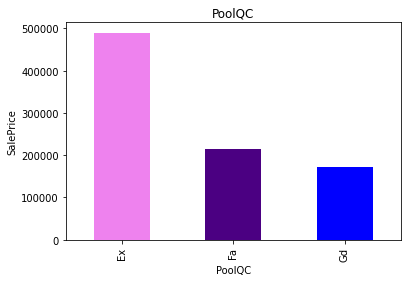

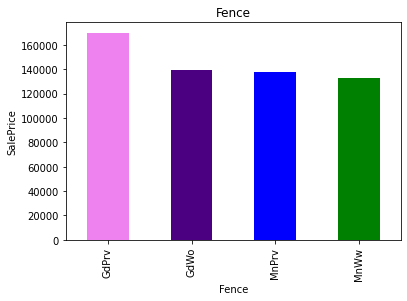

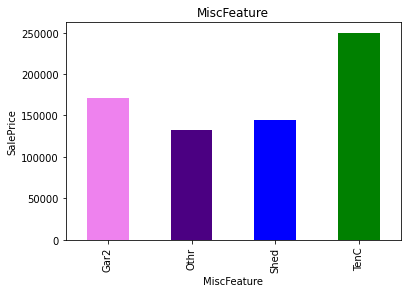

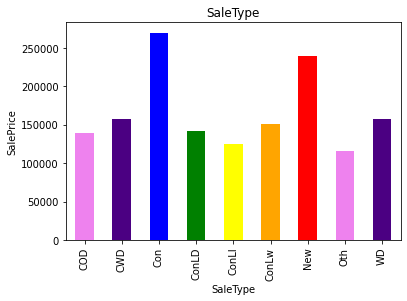

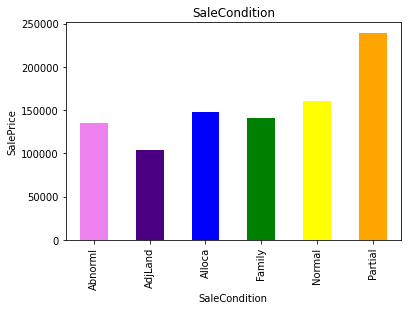

In [ ]:
#relationship between categorical variable and dependent feature SalePrice
for feature in categorical_features:
  data=dataset.copy()
  data.groupby(feature)['SalePrice'].median().plot.bar(color=['violet','indigo','blue','green','yellow','orange','red'])
  plt.xlabel(feature)
  plt.ylabel('SalePrice')
  plt.title(feature)
  plt.show()

**Feature Engineering**

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(dataset,dataset['SalePrice'],test_size=0.1,random_state=0)

In [ ]:
X_train.shape, X_test.shape

((1051, 81), (117, 81))

In [ ]:
#handling the categorical features which are missing
features_nan=[feature for feature in dataset.columns if dataset[feature].isnull().sum()>1 and dataset[feature].dtypes=='O']

for feature in features_nan:
    print("{}: {}% missing values".format(feature,np.round(dataset[feature].isnull().mean(),4)))

Alley: 0.9341% missing values
MasVnrType: 0.006% missing values
BsmtQual: 0.0257% missing values
BsmtCond: 0.0257% missing values
BsmtExposure: 0.0265% missing values
BsmtFinType1: 0.0257% missing values
BsmtFinType2: 0.0265% missing values
FireplaceQu: 0.4717% missing values
GarageType: 0.0548% missing values
GarageFinish: 0.0548% missing values
GarageQual: 0.0548% missing values
GarageCond: 0.0548% missing values
PoolQC: 0.994% missing values
Fence: 0.7971% missing values
MiscFeature: 0.9623% missing values


In [ ]:
# Replace missing value with a new label
def replace_cat_feature(dataset,features_nan):
    data=dataset.copy()
    data[features_nan]=data[features_nan].fillna('Missing')
    return data

dataset=replace_cat_feature(dataset,features_nan)

dataset[features_nan].isnull().sum()

Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [ ]:
dataset.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street    Alley LotShape  \
0  127         120       RL          NaN     4928   Pave  Missing      IR1   
1  889          20       RL         95.0    15865   Pave  Missing      IR1   
2  793          60       RL         92.0     9920   Pave  Missing      IR1   
3  110          20       RL        105.0    11751   Pave  Missing      IR1   
4  422          20       RL          NaN    16635   Pave  Missing      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      NPkVill       Norm   
1         Lvl    AllPub    Inside       Mod        NAmes       Norm   
2         Lvl    AllPub   CulDSac       Gtl      NoRidge       Norm   
3         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
4         Lvl    AllPub       FR2       Gtl       NWAmes       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm   TwnhsE     1Story            6            5       1976   
1       Norm     1Fam     1Story            8            6       1970   
2       Norm     1Fam     2Story            7            5       1996   
3       Norm     1Fam     1Story            6            6       1977   
4       Norm     1Fam     1Story            6            7       1977   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1976     Gable  CompShg     Plywood     Plywood       None   
1          1970      Flat  Tar&Grv     Wd Sdng     Wd Sdng       None   
2          1997     Gable  CompShg     MetalSd     MetalSd       None   
3          1977       Hip  CompShg     Plywood     Plywood    BrkFace   
4          2000     Gable  CompShg     CemntBd     CmentBd      Stone   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       Gd       TA           No   
1         0.0        Gd        Gd      PConc       TA       Gd           Gd   
2         0.0        Gd        TA      PConc       Gd       TA           Av   
3       480.0        TA        TA     CBlock       Gd       TA           No   
4       126.0        Gd        TA     CBlock       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          ALQ         120          Unf           0        958         1078   
1          ALQ         351          Rec         823       1043         2217   
2          GLQ         862          Unf           0        255         1117   
3          BLQ         705          Unf           0       1139         1844   
4          ALQ        1246          Unf           0        356         1602   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       958         0             0   
1    GasA        Ex          Y      SBrkr      2217         0             0   
2    GasA        Ex          Y      SBrkr      1127       886             0   
3    GasA        Ex          Y      SBrkr      1844         0             0   
4    GasA        Gd          Y      SBrkr      1602         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        958             0             0         2         0             2   
1       2217             1             0         2         0             4   
2       2013             1             0         2         1             3   
3       1844             0             0         2         0             3   
4       1602             0             1         2         0             3   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           1          TA   
1             1          Gd             8        Typ           1          TA   
2             1          TA             8        Typ           1          TA   
3             1 

In [ ]:
# Now lets check for numerical variables the contains missing values
numerical_with_nan=[feature for feature in dataset.columns if dataset[feature].isnull().sum()>1 and dataset[feature].dtypes!='O']

# We will print the numerical nan variables and percentage of missing values

for feature in numerical_with_nan:
    print("{}: {}% missing value".format(feature,np.around(dataset[feature].isnull().mean(),4)))

LotFrontage: 0.1832% missing value
MasVnrArea: 0.006% missing value
GarageYrBlt: 0.0548% missing value


In [ ]:
for feature in numerical_with_nan:
    ## We will replace by using median since there are outliers
    median_value=dataset[feature].median()
    
    ## create a new feature to capture nan values
    dataset[feature+'nan']=np.where(dataset[feature].isnull(),1,0)
    dataset[feature].fillna(median_value,inplace=True)
    
dataset[numerical_with_nan].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [ ]:
dataset.head(50)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street    Alley LotShape  \
0    127         120       RL         70.0     4928   Pave  Missing      IR1   
1    889          20       RL         95.0    15865   Pave  Missing      IR1   
2    793          60       RL         92.0     9920   Pave  Missing      IR1   
3    110          20       RL        105.0    11751   Pave  Missing      IR1   
4    422          20       RL         70.0    16635   Pave  Missing      IR1   
5   1197          60       RL         58.0    14054   Pave  Missing      IR1   
6    561          20       RL         70.0    11341   Pave  Missing      IR1   
7   1041          20       RL         88.0    13125   Pave  Missing      Reg   
8    503          20       RL         70.0     9170   Pave  Missing      Reg   
9    576          50       RL         80.0     8480   Pave  Missing      Reg   
10   449          50       RM         50.0     8600   Pave  Missing      Reg   
11   833          60       RL         44.0     9548   Pave  Missing      IR1   
12   277          20       RL        129.0     9196   Pave  Missing      IR1   
13    84          20       RL         80.0     8892   Pave  Missing      IR1   
14   888          50       RL         59.0    16466   Pave  Missing      IR1   
15  1013          70       RL         55.0    10592   Pave  Missing      Reg   
16  1154          30       RM         70.0     5890   Pave  Missing      Reg   
17   728          20       RL         64.0     7314   Pave  Missing      Reg   
18   270          20       RL         70.0     7917   Pave  Missing      IR1   
19  1105         160       RM         24.0     2016   Pave  Missing      Reg   
20   259          60       RL         80.0    12435   Pave  Missing      Reg   
21  1407          85       RL         70.0     8445   Pave  Missing      Reg   
22  1459          20       RL         68.0     9717   Pave  Missing      Reg   
23   997          20       RL         70.0    10659   Pave  Missing      IR1   
24  1094          20       RL         71.0     9230   Pave  Missing      Reg   
25   114          20       RL         70.0    21000   Pave  Missing      Reg   
26  1384          30       RL         70.0    25339   Pave  Missing      Reg   
27   379          20       RL         88.0    11394   Pave  Missing      Reg   
28   556          45       RM         58.0     6380   Pave  Missing      Reg   
29   464          70       RL         74.0    11988   Pave  Missing      IR1   
30    46         120       RL         61.0     7658   Pave  Missing      Reg   
31   426          60       RM         60.0     3378   Pave     Grvl      Reg   
32  1231          90       RL         70.0    18890   Pave  Missing      IR1   
33   171          50       RM         70.0    12358   Pave  Missing      IR1   
34   869          60       RL         70.0    14762   Pave  Missing      IR2   
35   151          20       RL        120.0    10356   Pave  Missing      Reg   
36   859          20       RL         80.0    10400   Pave  Missing      Reg   
37   176          20       RL         84.0    12615   Pave  Missing      Reg   
38   361          85       RL         70.0     7540   Pave  Missing      IR1   
39   590          40       RM         50.0     9100   Pave  Missing      Reg   
40   172          20       RL        141.0    31770   Pave  Missing      IR1   
41   527          20       RL         70.0    13300   Pave  Missing      Reg   
42  1365         160       FV         30.0     3180   Pave     Pave      Reg   
43   146         160       RM         24.0     2522   Pave  Missing      Reg   
44  1006          80       RL         65.0     8385   Pave  Missing      Reg   
45   275          20       RL         76.0     8314   Pave  Missing      Reg   
46   380          60       RL         60.0     8123   Pave  Missing      IR1   
47  1309          20       RM        100.0    12000   Pave  Missing      Reg   
48   534          20       RL         50.0     5000   Pave  Missing      Reg   
49   4

In [ ]:
# Temporal Variables (Date Time Variables)

for feature in ['YearBuilt','YearRemodAdd','GarageYrBlt']:
       
    dataset[feature]=dataset['YrSold']-dataset[feature]

In [ ]:
dataset.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street    Alley LotShape  \
0  127         120       RL         70.0     4928   Pave  Missing      IR1   
1  889          20       RL         95.0    15865   Pave  Missing      IR1   
2  793          60       RL         92.0     9920   Pave  Missing      IR1   
3  110          20       RL        105.0    11751   Pave  Missing      IR1   
4  422          20       RL         70.0    16635   Pave  Missing      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      NPkVill       Norm   
1         Lvl    AllPub    Inside       Mod        NAmes       Norm   
2         Lvl    AllPub   CulDSac       Gtl      NoRidge       Norm   
3         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
4         Lvl    AllPub       FR2       Gtl       NWAmes       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm   TwnhsE     1Story            6            5         31   
1       Norm     1Fam     1Story            8            6         37   
2       Norm     1Fam     2Story            7            5         11   
3       Norm     1Fam     1Story            6            6         33   
4       Norm     1Fam     1Story            6            7         32   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0            31     Gable  CompShg     Plywood     Plywood       None   
1            37      Flat  Tar&Grv     Wd Sdng     Wd Sdng       None   
2            10     Gable  CompShg     MetalSd     MetalSd       None   
3            33       Hip  CompShg     Plywood     Plywood    BrkFace   
4             9     Gable  CompShg     CemntBd     CmentBd      Stone   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       Gd       TA           No   
1         0.0        Gd        Gd      PConc       TA       Gd           Gd   
2         0.0        Gd        TA      PConc       Gd       TA           Av   
3       480.0        TA        TA     CBlock       Gd       TA           No   
4       126.0        Gd        TA     CBlock       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          ALQ         120          Unf           0        958         1078   
1          ALQ         351          Rec         823       1043         2217   
2          GLQ         862          Unf           0        255         1117   
3          BLQ         705          Unf           0       1139         1844   
4          ALQ        1246          Unf           0        356         1602   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       958         0             0   
1    GasA        Ex          Y      SBrkr      2217         0             0   
2    GasA        Ex          Y      SBrkr      1127       886             0   
3    GasA        Ex          Y      SBrkr      1844         0             0   
4    GasA        Gd          Y      SBrkr      1602         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        958             0             0         2         0             2   
1       2217             1             0         2         0             4   
2       2013             1             0         2         1             3   
3       1844             0             0         2         0             3   
4       1602             0             1         2         0             3   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           1          TA   
1             1          Gd             8        Typ           1          TA   
2             1          TA             8        Typ           1          TA   
3             1 

In [ ]:
dataset[['YearBuilt','YearRemodAdd','GarageYrBlt']].head()

YearBuilt  YearRemodAdd  GarageYrBlt
0         31            31         30.0
1         37            37         37.0
2         11            10         10.0
3         33            33         33.0
4         32             9         32.0

In [ ]:
num_features=['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']

for feature in num_features:
    dataset[feature]=np.log(dataset[feature])

In [ ]:
dataset.head()

Id  MSSubClass MSZoning  LotFrontage   LotArea Street    Alley LotShape  \
0  127         120       RL     4.248495  8.502689   Pave  Missing      IR1   
1  889          20       RL     4.553877  9.671871   Pave  Missing      IR1   
2  793          60       RL     4.521789  9.202308   Pave  Missing      IR1   
3  110          20       RL     4.653960  9.371694   Pave  Missing      IR1   
4  422          20       RL     4.248495  9.719264   Pave  Missing      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      NPkVill       Norm   
1         Lvl    AllPub    Inside       Mod        NAmes       Norm   
2         Lvl    AllPub   CulDSac       Gtl      NoRidge       Norm   
3         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
4         Lvl    AllPub       FR2       Gtl       NWAmes       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm   TwnhsE     1Story            6            5         31   
1       Norm     1Fam     1Story            8            6         37   
2       Norm     1Fam     2Story            7            5         11   
3       Norm     1Fam     1Story            6            6         33   
4       Norm     1Fam     1Story            6            7         32   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0            31     Gable  CompShg     Plywood     Plywood       None   
1            37      Flat  Tar&Grv     Wd Sdng     Wd Sdng       None   
2            10     Gable  CompShg     MetalSd     MetalSd       None   
3            33       Hip  CompShg     Plywood     Plywood    BrkFace   
4             9     Gable  CompShg     CemntBd     CmentBd      Stone   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       Gd       TA           No   
1         0.0        Gd        Gd      PConc       TA       Gd           Gd   
2         0.0        Gd        TA      PConc       Gd       TA           Av   
3       480.0        TA        TA     CBlock       Gd       TA           No   
4       126.0        Gd        TA     CBlock       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          ALQ         120          Unf           0        958         1078   
1          ALQ         351          Rec         823       1043         2217   
2          GLQ         862          Unf           0        255         1117   
3          BLQ         705          Unf           0       1139         1844   
4          ALQ        1246          Unf           0        356         1602   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr  6.864848         0             0   
1    GasA        Ex          Y      SBrkr  7.703910         0             0   
2    GasA        Ex          Y      SBrkr  7.027315       886             0   
3    GasA        Ex          Y      SBrkr  7.519692         0             0   
4    GasA        Gd          Y      SBrkr  7.379008         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0   6.864848             0             0         2         0             2   
1   7.703910             1             0         2         0             4   
2   7.607381             1             0         2         1             3   
3   7.519692             0             0         2         0             3   
4   7.379008             0             1         2         0             3   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           1          TA   
1             1          Gd             8        Typ           1          TA   
2             1          TA             8        Typ           1          TA   
3         

In [ ]:
temp_df

Index(['Abnorml', 'Alloca', 'Family', 'Normal', 'Partial'], dtype='object', name='SaleCondition')

In [ ]:
for feature in categorical_features:
    labels_ordered=dataset.groupby([feature])['SalePrice'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    dataset[feature]=dataset[feature].map(labels_ordered)

In [ ]:
dataset.head()

Id  MSSubClass  MSZoning  LotFrontage   LotArea  Street  Alley  LotShape  \
0  127         120         3     4.248495  8.502689       1      2         1   
1  889          20         3     4.553877  9.671871       1      2         1   
2  793          60         3     4.521789  9.202308       1      2         1   
3  110          20         3     4.653960  9.371694       1      2         1   
4  422          20         3     4.248495  9.719264       1      2         1   

   LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
0            1          0          1          1             4           2   
1            1          0          1          0             7           2   
2            1          0          4          1            20           2   
3            1          0          1          1            10           2   
4            1          0          0          1            10           2   

   Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
0           1         4           3            6            5         31   
1           1         3           3            8            6         37   
2           1         3           6            7            5         11   
3           1         3           3            6            6         33   
4           1         3           3            6            7         32   

   YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  \
0            31          1         0            7            6           1   
1            37          3         1            1            2           1   
2            10          1         0            2            1           1   
3            33          2         0            7            6           2   
4             9          1         0           10           10           4   

   MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  \
0         0.0          1          3           2         3         3   
1         0.0          2          2           4         2         4   
2         0.0          2          3           4         3         3   
3       480.0          1          3           2         3         3   
4       126.0          2          3           2         3         3   

   BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
0             1             4         120             4           0   
1             4             4         351             2         823   
2             3             6         862             4           0   
3             1             3         705             4           0   
4             1             4        1246             4           0   

   BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical  \
0        958         1078        2          2           1           3   
1       1043         2217        2          4           1           3   
2        255         1117        2          4           1           3   
3       1139         1844        2          4           1           3   
4        356         1602        2          3           1           3   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0  6.864848         0             0   6.864848             0             0   
1  7.703910         0             0   7.703910             1             0   
2  7.027315       886             0   7.607381             1             0   
3  7.519692         0             0   7.519692             0             0   
4  7.379008         0             0   7.379008             0             1   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0         2         0             2             1            1             5   
1         2         0             4             1            2             8   
2         2         1             3             1            1             8   
3         2         0             3             1   

In [ ]:
scaling_feature=[feature for feature in dataset.columns if feature not in ['Id','SalePerice'] ]
len(scaling_feature)

83

In [ ]:
scaling_feature

['MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'Enc

In [ ]:
dataset.head()

Id  MSSubClass  MSZoning  LotFrontage   LotArea  Street  Alley  LotShape  \
0  127         120         3     4.248495  8.502689       1      2         1   
1  889          20         3     4.553877  9.671871       1      2         1   
2  793          60         3     4.521789  9.202308       1      2         1   
3  110          20         3     4.653960  9.371694       1      2         1   
4  422          20         3     4.248495  9.719264       1      2         1   

   LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
0            1          0          1          1             4           2   
1            1          0          1          0             7           2   
2            1          0          4          1            20           2   
3            1          0          1          1            10           2   
4            1          0          0          1            10           2   

   Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
0           1         4           3            6            5         31   
1           1         3           3            8            6         37   
2           1         3           6            7            5         11   
3           1         3           3            6            6         33   
4           1         3           3            6            7         32   

   YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  \
0            31          1         0            7            6           1   
1            37          3         1            1            2           1   
2            10          1         0            2            1           1   
3            33          2         0            7            6           2   
4             9          1         0           10           10           4   

   MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  \
0         0.0          1          3           2         3         3   
1         0.0          2          2           4         2         4   
2         0.0          2          3           4         3         3   
3       480.0          1          3           2         3         3   
4       126.0          2          3           2         3         3   

   BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
0             1             4         120             4           0   
1             4             4         351             2         823   
2             3             6         862             4           0   
3             1             3         705             4           0   
4             1             4        1246             4           0   

   BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical  \
0        958         1078        2          2           1           3   
1       1043         2217        2          4           1           3   
2        255         1117        2          4           1           3   
3       1139         1844        2          4           1           3   
4        356         1602        2          3           1           3   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0  6.864848         0             0   6.864848             0             0   
1  7.703910         0             0   7.703910             1             0   
2  7.027315       886             0   7.607381             1             0   
3  7.519692         0             0   7.519692             0             0   
4  7.379008         0             0   7.379008             0             1   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0         2         0             2             1            1             5   
1         2         0             4             1            2             8   
2         2         1             3             1            1             8   
3         2         0             3             1   

In [ ]:
feature_scale=[feature for feature in dataset.columns if feature not in ['Id','SalePrice']]

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(dataset[feature_scale])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [ ]:
scaler.transform(dataset[feature_scale])

array([[0.58823529, 0.75      , 0.44563844, ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.75      , 0.55867239, ..., 0.        , 0.        ,
        0.        ],
       [0.23529412, 0.75      , 0.54679523, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.82352941, 0.75      , 0.0494253 , ..., 0.        , 0.        ,
        0.        ],
       [0.29411765, 0.        , 0.32109662, ..., 0.        , 0.        ,
        0.        ],
       [0.23529412, 0.75      , 0.44563844, ..., 1.        , 0.        ,
        0.        ]])

In [ ]:
# transform the train and test set, and add on the Id and SalePrice variables
data = pd.concat([dataset[['Id', 'SalePrice']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(dataset[feature_scale]), columns=feature_scale)],
                    axis=1)

In [ ]:
data.head()

Id  SalePrice  MSSubClass  MSZoning  LotFrontage   LotArea  Street  Alley  \
0  127  11.759786    0.588235      0.75     0.445638  0.275238     1.0    1.0   
1  889  12.498742    0.000000      0.75     0.558672  0.516729     1.0    1.0   
2  793  12.505399    0.235294      0.75     0.546795  0.419742     1.0    1.0   
3  110  12.154779    0.000000      0.75     0.595717  0.454728     1.0    1.0   
4  422  12.278393    0.000000      0.75     0.445638  0.526518     1.0    1.0   

   LotShape  LandContour  Utilities  LotConfig  LandSlope  Neighborhood  \
0  0.333333     0.333333        0.0       0.25        0.5          0.20   
1  0.333333     0.333333        0.0       0.25        0.0          0.35   
2  0.333333     0.333333        0.0       1.00        0.5          1.00   
3  0.333333     0.333333        0.0       0.25        0.5          0.50   
4  0.333333     0.333333        0.0       0.00        0.5          0.50   

   Condition1  Condition2  BldgType  HouseStyle  OverallQual  OverallCond  \
0         0.4         1.0      1.00         0.5     0.555556        0.500   
1         0.4         1.0      0.75         0.5     0.777778        0.625   
2         0.4         1.0      0.75         1.0     0.666667        0.500   
3         0.4         1.0      0.75         0.5     0.555556        0.625   
4         0.4         1.0      0.75         0.5     0.555556        0.750   

   YearBuilt  YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  \
0   0.229630      0.524590   0.333333       0.0          0.7          0.6   
1   0.274074      0.622951   1.000000       1.0          0.1          0.2   
2   0.081481      0.180328   0.333333       0.0          0.2          0.1   
3   0.244444      0.557377   0.666667       0.0          0.7          0.6   
4   0.237037      0.163934   0.333333       0.0          1.0          1.0   

   MasVnrType  MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  \
0        0.25     0.00000   0.333333   1.000000         0.5      0.75   
1        0.25     0.00000   0.666667   0.666667         1.0      0.50   
2        0.25     0.00000   0.666667   1.000000         1.0      0.75   
3        0.50     0.30000   0.333333   1.000000         0.5      0.75   
4        1.00     0.07875   0.666667   1.000000         0.5      0.75   

   BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
0      0.75          0.25      0.666667    0.021262      0.666667    0.000000   
1      1.00          1.00      0.666667    0.062190      0.333333    0.558345   
2      0.75          0.75      1.000000    0.152729      0.666667    0.000000   
3      0.75          0.25      0.500000    0.124911      0.666667    0.000000   
4      0.75          0.25      0.666667    0.220765      0.666667    0.000000   

   BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical  \
0   0.410103     0.176432      1.0       0.50         1.0         1.0   
1   0.446490     0.362848      1.0       1.00         1.0         1.0   
2   0.109161     0.182815      1.0       1.00         1.0         1.0   
3   0.487586     0.301800      1.0       1.00         1.0         1.0   
4   0.152397     0.262193      1.0       0.75         1.0         1.0   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0  0.398758  0.000000           0.0   0.372749      0.000000           0.0   
1  0.716287  0.000000           0.0   0.669568      0.333333           0.0   
2  0.460241  0.429056           0.0   0.635421      0.333333           0.0   
3  0.646573  0.000000           0.0   0.604401      0.000000           0.0   
4  0.593333  0.000000           0.0   0.554633      0.000000           0.5   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0  0.666667       0.0         0.250      0.333333     0.333333      0.250000   
1  0.666667       0.0         0.500      0.333333     0.666667      0.500000   
2  0.666667       0.5         0.375      0.333333     0.333333    

In [ ]:
data.to_csv('X_train.csv',index=False)

**Feature Selection**

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
# Capture the dependent feature
y_train=dataset[['SalePrice']]
# drop dependent feature from dataset
X_train=dataset.drop(['Id','SalePrice'],axis=1)

In [ ]:
feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=0,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [ ]:
feature_sel_model.get_support()

array([ True,  True, False,  True, False, False, False, False, False,
        True, False,  True, False, False, False,  True,  True,  True,
        True,  True, False, False,  True,  True, False,  True, False,
       False,  True, False, False,  True, False,  True,  True,  True,
        True,  True, False,  True, False, False,  True,  True,  True,
       False,  True, False, False, False, False, False,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True, False,
       False, False,  True,  True,  True,  True,  True,  True, False,
        True, False, False, False,  True, False,  True, False, False,
       False])

In [ ]:
# let's print the number of total and selected features

# this is how we can make a list of the selected features
selected_feat = X_train.columns[(feature_sel_model.get_support())]

# let's print some stats
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(feature_sel_model.estimator_.coef_ == 0)))

total features: 82
selected features: 43
features with coefficients shrank to zero: 38


In [ ]:
scaling_feature

['MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'Enc

In [ ]:
X_train=X_train[selected_feat]

In [ ]:
X_train.head()

MSSubClass  MSZoning   LotArea  LotConfig  Neighborhood  HouseStyle  \
0         120         3  8.502689          1             4           3   
1          20         3  9.671871          1             7           3   
2          60         3  9.202308          4            20           6   
3          20         3  9.371694          1            10           3   
4          20         3  9.719264          0            10           3   

   OverallQual  OverallCond  YearBuilt  YearRemodAdd  Exterior1st  \
0            6            5         31            31            7   
1            8            6         37            37            1   
2            7            5         11            10            2   
3            6            6         33            33            7   
4            6            7         32             9           10   

   Exterior2nd  MasVnrArea  Foundation  BsmtExposure  BsmtFinSF1  \
0            6         0.0           2             1         120   
1            2         0.0           4             4         351   
2            1         0.0           4             3         862   
3            6       480.0           2             1         705   
4           10       126.0           2             1        1246   

   BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  HeatingQC  1stFlrSF  \
0             4           0        958         1078          2  6.864848   
1             2         823       1043         2217          4  7.703910   
2             4           0        255         1117          4  7.027315   
3             4           0       1139         1844          4  7.519692   
4             4           0        356         1602          3  7.379008   

   2ndFlrSF  LowQualFinSF  BsmtFullBath  KitchenQual  TotRmsAbvGrd  \
0         0             0             0            1             5   
1         0             0             1            2             8   
2       886             0             1            1             8   
3         0             0             0            1             7   
4         0             0             0            2             8   

   Functional  FireplaceQu  GarageType  GarageYrBlt  GarageFinish  GarageCars  \
0           4            3           4         30.0             2           2   
1           4            3           4         37.0             1           2   
2           4            3           4         10.0             1           2   
3           4            3           4         33.0             2           2   
4           4            3           4         32.0             3           2   

   GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
0         440           0          205              0          0            0   
1         621          81          207              0          0          224   
2         455         180          130              0          0            0   
3         546           0          122              0          0            0   
4         529         240            0              0          0            0   

   PoolArea  Fence  YrSold  SaleCondition  
0         0      3    2007              4  
1         0      3    2007              4  
2         0      3    2007              4  
3         0      2    2010              4  
4         0      3    2009              4

In [ ]:
X_train.shape

(1168, 43)

**Model building**

In [74]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LinearRegression

In [80]:
def maxr2_score(regr,x,y):
    max_r_score=0
    for i in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(dataset,dataset['SalePrice'],random_state= i ,test_size=0.20)
        regr.fit(x,y)
        y_pred=regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_i=i
    print(" We are getting maximum  r2 score corresponding to",final_i,"is",max_r_score)
    return final_i

In [81]:
lreg=LinearRegression()
i=maxr2_score(lreg,dataset,dataset['SalePrice'])

 We are getting maximum  r2 score corresponding to 42 is 1.0


In [82]:
print("Mean r2 score for Linear Regression:",cross_val_score(lreg,dataset,dataset['SalePrice'],cv=5,scoring="r2").mean())
print("standard deviation in r2 score for Linear Regression",cross_val_score(lreg,dataset,dataset['SalePrice'],cv=5,scoring="r2").std())

Mean r2 score for Linear Regression: 1.0
standard deviation in r2 score for Linear Regression 0.0


In [85]:
# using Grid search CV to find best  parameters of different algorithim .
#Best parameters for  KNeighborsRegressor
knn=KNeighborsRegressor()
parameters={"n_neighbors" :range(1,10) , 'algorithm' :['auto', 'ball_tree', 'kd_tree', 'brute']}
gd=GridSearchCV(knn,parameters)
gd.fit(dataset,dataset['SalePrice'])
print(" Best parameters of KNeighborsRegressor is :-")
print(gd.best_params_)
print("\n")

#Best parameters for  DecisionTreeRegressor
dtr=DecisionTreeRegressor()
parameters={"criterion" :( 'mse', 'friedman_mse', 'mae') ,'max_features' : ['auto', 'sqrt', 'log2']}
gd=GridSearchCV(dtr,parameters)
gd.fit(dataset,dataset['SalePrice'])
print(" Best parameters of DecisionTreeRegressor is :-")
print(gd.best_params_)
print("\n")
#Best parameters for  GradientBoostRegressor
gbr=GradientBoostingRegressor()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[25,50,100,120,150]}
gd=GridSearchCV(gbr,parameters)
gd.fit(dataset,dataset['SalePrice'])
print(" Best parameters of GradientBoostingRegressor is :-")
print(gd.best_params_)
print("\n")


#Best parameters for  LassoRegressor
lsreg=Lasso()
parameters={"alpha":[0.001,0.01,0.1,1] , 'selection' : ['cyclic', 'random']}
gd=GridSearchCV(lsreg,parameters)
gd.fit(dataset,dataset['SalePrice'])
print(" Best parameters of Lasso is :-")
print(gd.best_params_)
print("\n")

#Best parameters for  RandomForestRegressor
rfr=RandomForestRegressor()
parameters={"n_estimators":[10,50,100,120,150],"max_features": ["auto", "sqrt", "log2"]}
gd=GridSearchCV(rfr,parameters,cv=5)
gd.fit(dataset,dataset['SalePrice'])
print(" Best parameters of RandomForestRegressor is :-")
print(gd.best_params_)
print("\n")



#Best parameters for  AdaBoostRegressor
ada=AdaBoostRegressor()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[25,50,100,150,200]}
gd=GridSearchCV(ada,parameters)
gd.fit(dataset,dataset['SalePrice'])
print(" Best parameters of AdaBoostRegressor is :-")
print(gd.best_params_)
print("\n")


 Best parameters of KNeighborsRegressor is :-
{'algorithm': 'auto', 'n_neighbors': 7}


 Best parameters of DecisionTreeRegressor is :-
{'criterion': 'friedman_mse', 'max_features': 'auto'}


 Best parameters of GradientBoostingRegressor is :-
{'learning_rate': 0.1, 'n_estimators': 100}




/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.93966266400116, tolerance: 0.01457873404976717
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.914593333553456, tolerance: 0.014550033304741774
  positive)


 Best parameters of Lasso is :-
{'alpha': 0.001, 'selection': 'cyclic'}


 Best parameters of RandomForestRegressor is :-
{'max_features': 'auto', 'n_estimators': 100}


 Best parameters of AdaBoostRegressor is :-
{'learning_rate': 1, 'n_estimators': 100}




In [88]:
# Finding best r2 score value for KNeighbors regressor 
print("KNeighbors regressor ")

knn=KNeighborsRegressor(n_neighbors= 7 , algorithm = 'auto')
i=maxr2_score(knn,dataset,dataset['SalePrice'])
print(" ")
print("Mean r2 score for KNeighbor  Regression:",cross_val_score(knn,dataset,dataset['SalePrice'],cv=135,scoring="r2").mean())
print("standard deviation in r2 score for KNeighbor   Regression",cross_val_score(knn,dataset,dataset['SalePrice'],cv=5,scoring="r2").std())

print("\n_____________________________________________________________________________________________________________\n")


# Finding best r2 score value for DecisionTreeRegressor
print("DecisionTreeRegressor")

dtc=DecisionTreeRegressor(criterion = 'friedman_mse'  , max_features = 'auto')
i=maxr2_score(dtc,dataset,dataset['SalePrice'])
print(" ")
from sklearn.model_selection import cross_val_score
print("Mean r2 score for DecisionTreeRegressor :",cross_val_score(dtc,dataset,dataset['SalePrice'],cv=139,scoring="r2").mean())
print("standard deviation in r2 score for DecisionTreeRegressor",cross_val_score(dtc,dataset,dataset['SalePrice'],cv=5,scoring="r2").std())

print("\n_____________________________________________________________________________________________________________\n")

# Finding best r2 score value for  GradientBoostingRegressor
print("GradientBoostingRegressor")

gbr=GradientBoostingRegressor(n_estimators=100 , learning_rate = 0.1)
i=maxr2_score(gbr,dataset,dataset['SalePrice'])
print(" ")
print("Mean r2 score for GradientBoostingRegressor :",cross_val_score(gbr,dataset,dataset['SalePrice'],cv=10,scoring="r2").mean())
print("standard deviation in r2 score for GradientBoostingRegressor ",cross_val_score(gbr,dataset,dataset['SalePrice'],cv=5,scoring="r2").std())

print("\n_____________________________________________________________________________________________________________\n")


# Finding best r2 score value for Lasso Regressor 
print("Lasso Regressor")

lsreg=Lasso(alpha=1 , selection = 'random')
i=maxr2_score(lsreg,dataset,dataset['SalePrice'])
print(" ")
print("Mean r2 score for Lasso Regression:",cross_val_score(lsreg,dataset,dataset['SalePrice'],cv=63,scoring="r2").mean())
print("standard deviation in r2 score for Lasso Regression",cross_val_score(lsreg,dataset,dataset['SalePrice'],cv=5,scoring="r2").std())

print("\n_____________________________________________________________________________________________________________\n")


# Finding best r2 score value for Random Forest Regressor 
print("Random Forest Regressor Regressor")

rfr=RandomForestRegressor(max_features='auto' , n_estimators = 100)
i=maxr2_score(rfr,dataset,dataset['SalePrice'])
print(" ")
print("Mean r2 score for Lasso Regression:",cross_val_score(lsreg,dataset,dataset['SalePrice'],cv=63,scoring="r2").mean())
print("standard deviation in r2 score for Lasso Regression",cross_val_score(lsreg,dataset,dataset['SalePrice'],cv=5,scoring="r2").std())

print("\n_____________________________________________________________________________________________________________\n")


# Finding best r2 score value for  AdaBoostRegressor
print("AdaBoostRegressor")

ada=AdaBoostRegressor(n_estimators=100 , learning_rate = 1)
i=maxr2_score(ada,dataset,dataset['SalePrice'])
print(" ")
print("Mean r2 score for AdaBoostRegressor :",cross_val_score(ada,dataset,dataset['SalePrice'],cv=10,scoring="r2").mean())
print("standard deviation in r2 score for AdaBoostRegressor ",cross_val_score(ada,dataset,dataset['SalePrice'],cv=5,scoring="r2").std())

print("\n_____________________________________________________________________________________________________________\n")



KNeighbors regressor 
 We are getting maximum  r2 score corresponding to 85 is 0.8467508836777663
 
Mean r2 score for KNeighbor  Regression: 0.5416905946279116
standard deviation in r2 score for KNeighbor   Regression 0.029602491764154575

_____________________________________________________________________________________________________________

DecisionTreeRegressor
 We are getting maximum  r2 score corresponding to 78 is 0.9999999635072608
 
Mean r2 score for DecisionTreeRegressor : 0.9992369645516689
standard deviation in r2 score for DecisionTreeRegressor 0.0009114774971327274

_____________________________________________________________________________________________________________

GradientBoostingRegressor
 We are getting maximum  r2 score corresponding to 45 is 0.9999534365560767
 
Mean r2 score for GradientBoostingRegressor : 0.9995931918396325
standard deviation in r2 score for GradientBoostingRegressor  0.0003689046113226992

___________________________________________

**Decision Tree Regressor is giving best result ** 

In [90]:
x_train,x_test,y_train,y_test=train_test_split(dataset,dataset['SalePrice'],random_state=92,test_size=0.20)
dt=DecisionTreeRegressor(criterion='friedman_mse',max_features='auto')
dt.fit(dataset,dataset['SalePrice'])
y_pred=dt.predict(x_test)

In [91]:
print("RMSE is: ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2_score is:",r2_score(y_test,y_pred))

RMSE is:  0.00011645327374872253
r2_score is: 0.9999999033253483


In [92]:
import joblib
joblib.dump(gbr,"House_Price.pkl")

['House_Price.pkl']

In [93]:
model=joblib.load('House_Price.pkl')

In [96]:
House_Price=model.predict(dataset)
House_Price

array([11.76274801, 12.49337698, 12.51344905, ..., 11.91619812,
       10.59746571, 12.11940949])

In [97]:
df3=pd.DataFrame({"House_Price":House_Price})
df3.head(10)

House_Price
0    11.762748
1    12.493377
2    12.513449
3    12.154425
4    12.280177
5    12.298570
6    11.701694
7    11.951139
8    11.849341
9    11.686083